Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 579s 1s/step - accuracy: 0.4569 - loss: 1.4882 - val_accuracy: 0.6527 - val_loss: 0.9286
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 571s 1s/step - accuracy: 0.6023 - loss: 1.0379 - val_accuracy: 0.7217 - val_loss: 0.7623
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 630s 1s/step - accuracy: 0.6407 - loss: 0.9603 - val_accuracy: 0.7363 - val_loss: 0.7144
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 582s 1s/step - accuracy: 0.6655 - loss: 0.8941 - val_accuracy: 0.7587 - val_loss: 0.6793
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 617s 1s/step - accuracy: 0.6955 - loss: 0.8411 - val_accuracy: 0.7540 - val_loss: 0.6566
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 310ms/step - accuracy: 0.7562 - loss: 0.6573
Test Accuracy: 75.40%


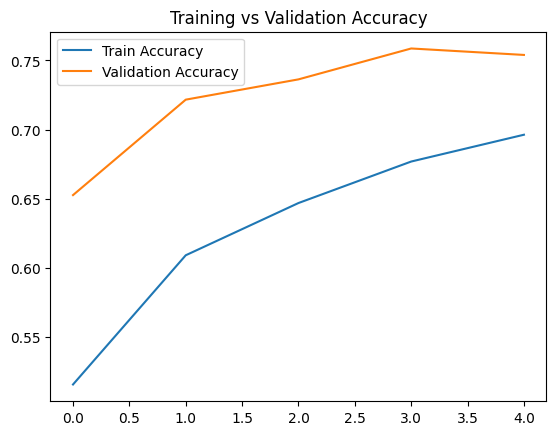

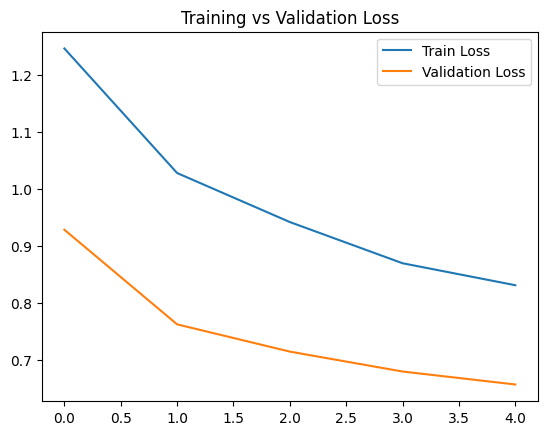

Model saved successfully!


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')  # 6 output classes
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
model.save("/content/basic_cnn_model.h5")
print("Model saved successfully!")